# 线性回归

如何在 TensorFlow 2 中构建、求解和进行预测模型。我们将专注于一种简单的模型类型——线性回归模型，并尝试预测房屋价格。通过关卡的学习，将学习如何加载和处理数据，构建损失函数，进行最小化操作，进行预测，并通过批量训练降低资源使用。

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np

## 导入数据

在训练深度学习模型之前，必须先导入数据。，我们将使用来自pandas的一个简单的一行代码：`pd.read_csv()`。

In [21]:
# 导入房价数据
housing = pd.read_csv("../data/kc_house_data.csv")

# 打印房价数据
print(housing['price'])

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64


### 设置数据类型
- 使用pandas和numpy设置数据类型 
- 使用tf.cast设置数据类型

In [22]:
# 使用numpy设置数据类型
price = np.array(housing['price'],np.float32)

# 使用tf.cast设置waterfront数据类型
waterfront = tf.cast(housing['waterfront'], tf.bool)

# 打印pirce和watetfront
print(price)
print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


## 损失函数
- 深度学习中的基本要素
    - 用来训练模型
    - 测度模型的拟合程度
- 常用的损失函数
    - 均方误差（mse）tf.keras.losses.mse()
        - 强烈的异常值惩罚机制、最小值附近具有高灵敏度
    - 平均绝对误差（mae）tf.keras.losses.mae()
        - 误差与大小呈现线性比例、最小值附近具有低灵敏度



### 在TensorFlow中使用损失函数

使用King County房屋数据集中的数据计算损失。我们有一个目标tensor price，它是一个包含房价`price`的张量，还有一个预测的房价张量`predictions`。我们将构建评估损失函数，并打印出损失的值。

In [23]:
kc_sample = pd.read_csv('../data/loss_price.csv')
price = kc_sample['price'].to_numpy()
predictions = kc_sample['pred'].to_numpy()

In [24]:
# 计算均方误差
loss = tf.keras.losses.mse(price,predictions)

# 打印
print(loss.numpy())

141171604777.12717


In [25]:
# 计算平均绝对误差 (mse)
loss = tf.keras.losses.mae(price,predictions)

#  打印
print(loss.numpy())

268827.9930208799


即使price和predictions相同，MAE的值要比MSE小得多。这是因为不同的损失函数以不同的方式惩罚predictions与price之间的偏差。MSE不喜欢大的偏差，并且会严厉地惩罚它们。

### 调整损失函数

现在我们来构建一个可以训练模型变量的损失函数，返回函数的损失值。在我们的实践深度学习的中，我们通常会把我们的损失传递给优化器

In [19]:
features = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
targets = tf.constant([2, 4, 6, 8, 10], dtype=tf.float32)

In [27]:
#初始化变量为scalar
scalar = tf.Variable(1.0,tf.float32)

# 定义模型
def model(scalar, features=features):
    return scalar*features
    

# 定于损失函数
def loss_function(scalar, features=features, targets=targets):
    # 计算预测值
    predictions = model(scalar,features)
    
    # 返回平均绝对误差
    return tf.keras.losses.mae(targets,predictions)

# 打印损失值
print(loss_function(scalar).numpy())

3.0


## 线性回归

### 构建线性回归模型
我们尝试构建一个单个特征与目标张量关系的线性回归模型。我们使用房价的价格(price)和面积(size),我们将会取它们的自然对数

除了定义模型，我们还会定义一个损失函数。我们将通过不同的斜率和截距来评估我们的损失函数的值。

In [48]:
size_log = np.log(np.array(housing['sqft_lot'], np.float32))
price_log = np.log(np.array(housing['price'], np.float32))
bedrooms = np.array(housing['bedrooms'], np.float32)

In [50]:
# 定义一个线性回归模型
def linear_regression(intercept,slope,features=size_log):
    return intercept+slope*features

#构建损失函数
def loss_function(intercept, slope, features=size_log, targets=price_log):
    # Set the predicted values
    predictions =linear_regression(intercept,slope,features)
    
    # Return the mean squared error loss
    return tf.keras.losses.mse(targets, predictions)

#打印不同截距和斜率下损失函数的值
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44653
71.866


### 训练线性回归模型
那么我们训练模型的目前就是为了最小化损失，寻找出最佳的斜率和截距`intercept`& `slope`。我们定义一个优化器`opt`来实现这个目标。
我们需要**多次重复**去寻找损失函数的最小值！

In [52]:
intercept = tf.Variable(0.0, tf.float32)
slope = tf.Variable(0.0, tf.float32)

# 定义优化器
opt = tf.keras.optimizers.Adam(learning_rate=0.5)
#寻找损失函数的最小值
for j in range(100):
    # 实现损失函数的最小化
    opt.minimize(lambda: loss_function(intercept,slope),var_list=[intercept,slope])
    
    #打印损失值
    if j%10==0:
        print(loss_function(intercept,slope).numpy())


65.26133
1.4909137
2.3818183
2.9086726
2.6110854
1.7604771
1.3467993
1.3559676
1.288407
1.2425306


In [53]:
#尝试绘制一下
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
def plot_results(intercept, slope):
    size_range = np.linspace(6,14,100)
    price_pred = [intercept + slope * s for s in size_range]
    plt.figure(figsize=(8, 8))
    plt.scatter(size_log, price_log, color = 'black');
    plt.plot(size_range, price_pred, linewidth=3.0, color='red');
    plt.xlabel('面积log(size)');
    plt.ylabel('价格log(price)');
    plt.title('面积与价格的关系');
    plt.show()

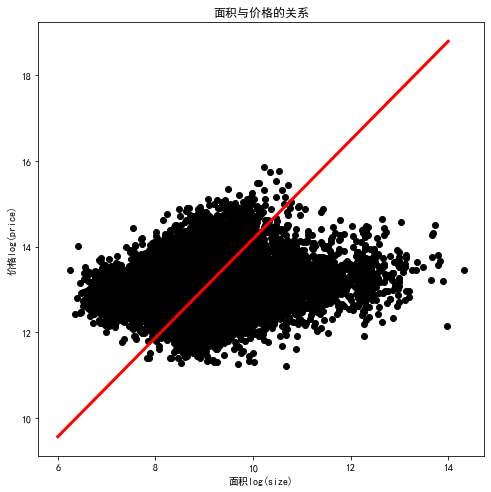

In [54]:
plot_results(intercept, slope)

在100次迭代中，我们每隔10次迭代就打印了loss_function(intercept, slope)的值。每次迭代，随着优化器将slope和intercept参数逐渐调整到它们的最佳值，损失函数的值也越来越接近最小值。

### 多元线性回归
大多数情况下，一元线性回归不太可能直接用于准确的预测模型。我们尝试一下多元线性回归

我们将增加一个特征`bedrooms`作为我们的特征,前面我们已经定义好了。这次我们尝试去使用MAE平均绝对误差。
最后我们的预测公式`params[0] + feature1 * params[1] + feature2 * params[2]`,注意：params是一个变量，在这里,`params[0]` 是截距，`params[1]` 和 `params[2]` 是斜率

In [42]:
#定义一个函数打印params的结果
def print_results(params):
    return print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'
                 .format(loss_function(params).numpy(), 
                         params[0].numpy(), 
                         params[1].numpy(), 
                         params[2].numpy()))

In [55]:
params = tf.Variable([0.1, 0.05, 0.02], tf.float32)

# 定义多元线性回归模型
def linear_regression(params, feature1=size_log, feature2=bedrooms):
    return params[0] + feature1 * params[1] + feature2 * params[2]

# 定义损失函数
def loss_function(params, targets=price_log, feature1=size_log, feature2=bedrooms):
    # 构建预测值
    predictions = linear_regression(params, feature1, feature2)
    
    return tf.keras.losses.mae(targets, predictions)

#定义优化器
opt = tf.keras.optimizers.Adam()

#寻找损失函数的最小值
for j in range(10):
    opt.minimize(lambda: loss_function(params), var_list=[params])
    print_results(params)

loss: 12.418, intercept: 0.101, slope_1: 0.051, slope_2: 0.021
loss: 12.404, intercept: 0.102, slope_1: 0.052, slope_2: 0.022
loss: 12.391, intercept: 0.103, slope_1: 0.053, slope_2: 0.023
loss: 12.377, intercept: 0.104, slope_1: 0.054, slope_2: 0.024
loss: 12.364, intercept: 0.105, slope_1: 0.055, slope_2: 0.025
loss: 12.351, intercept: 0.106, slope_1: 0.056, slope_2: 0.026
loss: 12.337, intercept: 0.107, slope_1: 0.057, slope_2: 0.027
loss: 12.324, intercept: 0.108, slope_1: 0.058, slope_2: 0.028
loss: 12.311, intercept: 0.109, slope_1: 0.059, slope_2: 0.029
loss: 12.297, intercept: 0.110, slope_1: 0.060, slope_2: 0.030


## 批训练
- 完整样本训练 vs 批训练
    - 完整样本训练
        1. 每个训练周期参数只更新一次
        2. 接收的数据集不需要进行修改
        3. 数据的大小有限制
    - 批训练
        1. 每个训练周期多次更新参数
        2. 导入的数据集需要修改
        3. 数据大小没有限制

在批处理中训练线性模型之前，我们首先需要定义变量、损失函数和优化操作。在这个练习中，我们将准备训练一个模型，使用size_batch（一批房屋的占地面积）来预测price_batch（一批房屋的价格）。与之前的不同，我们将通过使用pandas加载数据批次，将其转换为NumPy数组，然后逐步最小化损失函数来完成这个任务。

**请注意，不应为模型或损失函数设置默认参数值，因为我们将在训练过程中生成批次数据。**

In [57]:
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# 定义模型
def linear_regression(intercept, slope, features):
    
    return intercept + slope * features


def loss_function(intercept, slope, targets, features):
    
    predictions = linear_regression(intercept, slope, features)
    
    
    return tf.keras.losses.mse(targets, predictions)

请注意，我们没有为输入数据`features`和`targets`使用默认参数值。这是因为输入数据没有提前定义。相反，在批处理训练中，我们将在训练过程中加载数据。







我们将通过按批次迭代数据集，并在每个步骤后更新模型的变量intercept和slope来实现这一目标。这种方法将允许我们训练那些太大无法一次加载到内存中的数据集。

注意：可训练的变量应按照它们在损失函数参数中出现的顺序输入到var_list中。

In [60]:
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# 初始化优化器
opt = tf.keras.optimizers.Adam()

# 使用批处理导入数据
for batch in pd.read_csv('../data/kc_house_data.csv',chunksize=100):
    #提取一批数据
    size_batch = np.array(batch['sqft_lot'], np.float32)
    price_batch = np.array(batch['price'], np.float32)
    
    # 求解最小损失函数下斜率和截距
    opt.minimize(lambda: loss_function(intercept,slope,price_batch,size_batch),var_list=[intercept,slope])
# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016001
